In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statistics

# Load the data set
life_data = pd.read_csv("Life Expectancy Data.csv")

life_data.rename(columns = {'Life expectancy ':'Life expectancy'}, inplace = True)

# Print first few rows
print("First few rows:\n")
life_data.head()

First few rows:



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Print last few rows
print("Last few rows:\n")
life_data.tail()

Last few rows:



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
#Understanding the data
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# Calculate percentage of missing values for each column
missing_percentage = (life_data.isnull().mean() * 100).round(3)
print("\nPercentage of missing values for each column:\n")
print(missing_percentage)


Percentage of missing values for each column:

Country                             0.000
Year                                0.000
Status                              0.000
Life expectancy                     0.340
Adult Mortality                     0.340
infant deaths                       0.000
Alcohol                             6.603
percentage expenditure              0.000
Hepatitis B                        18.822
Measles                             0.000
 BMI                                1.157
under-five deaths                   0.000
Polio                               0.647
Total expenditure                   7.692
Diphtheria                          0.647
 HIV/AIDS                           0.000
GDP                                15.248
Population                         22.192
 thinness  1-19 years               1.157
 thinness 5-9 years                 1.157
Income composition of resources     5.684
Schooling                           5.548
dtype: float64


In [7]:
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
duplicates = life_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicate rows:", num_duplicates)

# Display the duplicated rows (if any)
if num_duplicates > 0:
    duplicated_rows = df[duplicates]
    print("Duplicated rows:")
    print(duplicated_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [9]:
#Mean
numerical_columns = life_data.select_dtypes(include=['number'])

# Calculate the mean for each numerical column
mean_values = numerical_columns.mean().round(2)

print(mean_values)

Year                                   2007.52
Life expectancy                          69.22
Adult Mortality                         164.80
infant deaths                            30.30
Alcohol                                   4.60
percentage expenditure                  738.25
Hepatitis B                              80.94
Measles                                2419.59
 BMI                                     38.32
under-five deaths                        42.04
Polio                                    82.55
Total expenditure                         5.94
Diphtheria                               82.32
 HIV/AIDS                                 1.74
GDP                                    7483.16
Population                         12753375.12
 thinness  1-19 years                     4.84
 thinness 5-9 years                       4.87
Income composition of resources           0.63
Schooling                                11.99
dtype: float64


In [10]:
#Median
# Calculate the median for each numerical column
median_values = numerical_columns.median().round(3)

print(median_values)

Year                                  2008.000
Life expectancy                         72.100
Adult Mortality                        144.000
infant deaths                            3.000
Alcohol                                  3.755
percentage expenditure                  64.913
Hepatitis B                             92.000
Measles                                 17.000
 BMI                                    43.500
under-five deaths                        4.000
Polio                                   93.000
Total expenditure                        5.755
Diphtheria                              93.000
 HIV/AIDS                                0.100
GDP                                   1766.948
Population                         1386542.000
 thinness  1-19 years                    3.300
 thinness 5-9 years                      3.300
Income composition of resources          0.677
Schooling                               12.300
dtype: float64


In [11]:
#Standard Deviation
# Calculate the std for each numerical column
std_values = numerical_columns.std().round(1)

print(std_values)

Year                                      4.6
Life expectancy                           9.5
Adult Mortality                         124.3
infant deaths                           117.9
Alcohol                                   4.1
percentage expenditure                 1987.9
Hepatitis B                              25.1
Measles                               11467.3
 BMI                                     20.0
under-five deaths                       160.4
Polio                                    23.4
Total expenditure                         2.5
Diphtheria                               23.7
 HIV/AIDS                                 5.1
GDP                                   14270.2
Population                         61012096.5
 thinness  1-19 years                     4.4
 thinness 5-9 years                       4.5
Income composition of resources           0.2
Schooling                                 3.4
dtype: float64


In [12]:
# Calculate the range for each column in the DataFrame
column_ranges = numerical_columns.max() - numerical_columns.min()
column_ranges_string = column_ranges.to_string(float_format="{:.2f}".format)
# Display the rounded ranges
print("Range of each column:")
print(column_ranges_string)

Range of each column:
Year                                      15.00
Life expectancy                           52.70
Adult Mortality                          722.00
infant deaths                           1800.00
Alcohol                                   17.86
percentage expenditure                 19479.91
Hepatitis B                               98.00
Measles                               212183.00
 BMI                                      86.30
under-five deaths                       2500.00
Polio                                     96.00
Total expenditure                         17.23
Diphtheria                                97.00
 HIV/AIDS                                 50.50
GDP                                   119171.06
Population                        1293859260.00
 thinness  1-19 years                     27.60
 thinness 5-9 years                       28.50
Income composition of resources            0.95
Schooling                                 20.70


In [13]:
column_variances = numerical_columns.var()

column_variances_string = column_variances.to_string(float_format="{:.2f}".format)
# Display the rounded Variance
print("Variance of each column:")
print(column_variances_string)

Variance of each column:
Year                                            21.29
Life expectancy                                 90.70
Adult Mortality                              15448.52
infant deaths                                13906.66
Alcohol                                         16.42
percentage expenditure                     3951805.48
Hepatitis B                                    628.51
Measles                                  131498338.34
 BMI                                           401.76
under-five deaths                            25742.77
Polio                                          548.87
Total expenditure                                6.24
Diphtheria                                     562.49
 HIV/AIDS                                       25.78
GDP                                      203637733.04
Population                        3722475920353729.00
 thinness  1-19 years                           19.54
 thinness 5-9 years                             20.33
Inc

In [14]:
#Median Imputation
# Select only numerical columns
numerical_columns = life_data.select_dtypes(include=['number'])

# Calculate the Median for each numerical column
median_values = numerical_columns.median()

# Fill null values in each numerical column with the corresponding Median value
df_filled = numerical_columns.fillna(median_values)

# Combine filled numerical columns with non-numerical columns
for column in life_data.columns:
    if column in numerical_columns:
        life_data[column] = df_filled[column]

#Missing percentage after median imputation
missing_percentage = (life_data.isnull().mean() * 100).round(3)
print(missing_percentage)

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


In [53]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

num_col_names = life_data.select_dtypes(include=['int64', 'float64']).columns

for col in num_col_names:
    outliers = detect_outliers(life_data[col])
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} potential outliers")


Column 'Life expectancy' has 17 potential outliers
Column 'Adult Mortality' has 86 potential outliers
Column 'infant deaths' has 315 potential outliers
Column 'Alcohol' has 3 potential outliers
Column 'percentage expenditure' has 389 potential outliers
Column 'Hepatitis B' has 316 potential outliers
Column 'Measles ' has 542 potential outliers
Column 'under-five deaths ' has 394 potential outliers
Column 'Polio' has 279 potential outliers
Column 'Total expenditure' has 51 potential outliers
Column 'Diphtheria ' has 298 potential outliers
Column ' HIV/AIDS' has 542 potential outliers
Column 'GDP' has 300 potential outliers
Column 'Population' has 194 potential outliers
Column ' thinness  1-19 years' has 100 potential outliers
Column ' thinness 5-9 years' has 99 potential outliers
Column 'Income composition of resources' has 130 potential outliers
Column 'Schooling' has 77 potential outliers


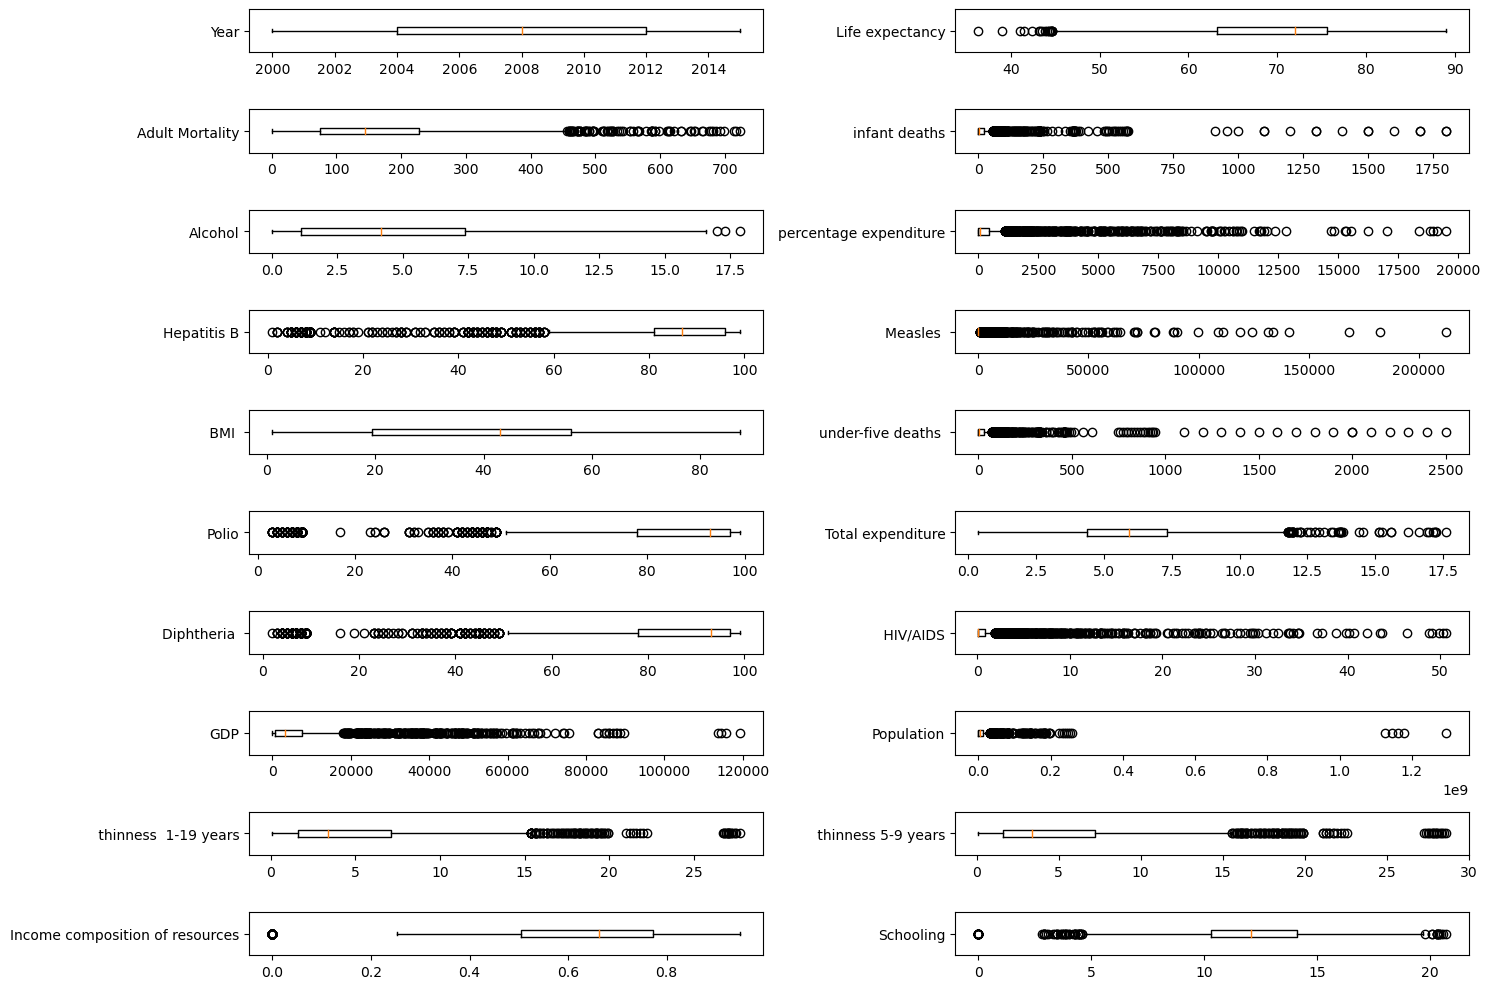

In [54]:
fig, ax_mat = plt.subplots(10,2,figsize=(15,10))
ax = [ ax_mat[0][0], ax_mat[0][1], ax_mat[1][0], ax_mat[1][1], ax_mat[2][0], ax_mat[2][1], ax_mat[3][0], ax_mat[3][1], ax_mat[4][0], ax_mat[4][1], ax_mat[5][0], ax_mat[5][1], ax_mat[6][0], ax_mat[6][1],ax_mat[7][0], ax_mat[7][1],ax_mat[8][0], ax_mat[8][1], ax_mat[9][0], ax_mat[9][1]]#, ax_mat[10][0], ax_mat[10][1] ]

num_col_names = life_data.select_dtypes(include=['int64', 'float64']).columns

for i in range(20):
    ax[i].boxplot(life_data[num_col_names[i]], vert=False)
    ax[i].set_yticks([1],[num_col_names[i]])
plt.tight_layout()
plt.show()

In [55]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
numerical_cols = life_data.select_dtypes(include=['int64', 'float64']).columns

#numerical_cols = ['Life expectancy'] #, 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
for col in numerical_cols:
    outliers = detect_outliers(life_data[col])
   
categorical_cols = ['Year']
for col in categorical_cols:
    outliers = detect_outliers(life_data[col])
    if not outliers.empty:
        mode_val = life_data[col].mode()[0]
        life_data.loc[outliers.index, col] = mode_val


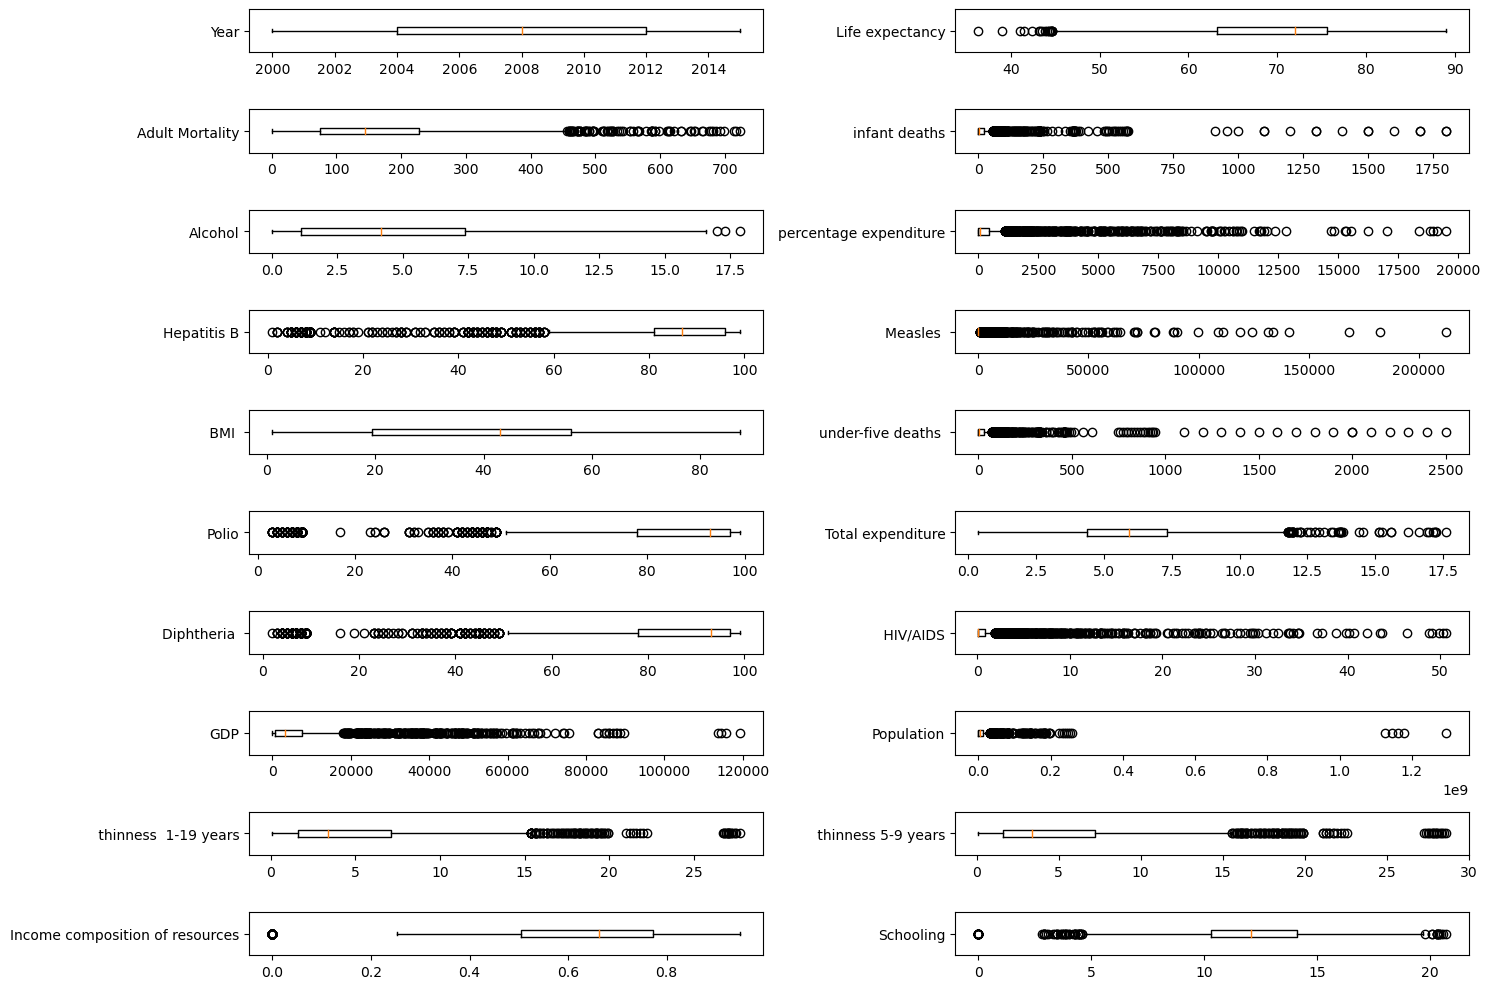

In [56]:
fig, ax_mat = plt.subplots(10,2,figsize=(15,10))
ax = [ ax_mat[0][0], ax_mat[0][1], ax_mat[1][0], ax_mat[1][1], ax_mat[2][0], ax_mat[2][1], ax_mat[3][0], ax_mat[3][1], ax_mat[4][0], ax_mat[4][1], ax_mat[5][0], ax_mat[5][1], ax_mat[6][0], ax_mat[6][1],ax_mat[7][0], ax_mat[7][1],ax_mat[8][0], ax_mat[8][1], ax_mat[9][0], ax_mat[9][1]]#, ax_mat[10][0], ax_mat[10][1] ]

num_col_names = life_data.select_dtypes(include=['int64', 'float64']).columns

for i in range(20):
    ax[i].boxplot(life_data[num_col_names[i]], vert=False)
    ax[i].set_yticks([1],[num_col_names[i]])
plt.tight_layout()
plt.show()

In [17]:
#Mode
# Iterate over each column in the DataFrame
for column in life_data.columns:
    # Calculate mode for the current column
    mode_value = life_data[column].mode()

    # Check if mode_value is not empty (i.e., there are mode(s) for the column)
    if not mode_value.empty:
        # Print the column name and its mode value(s)
        print(f"Mode value(s) for {column}:")
        print(mode_value.values)
    else:
        print(f"No mode value for {column}")

Mode value(s) for Country:
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' "Côte d'Ivoire"
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)

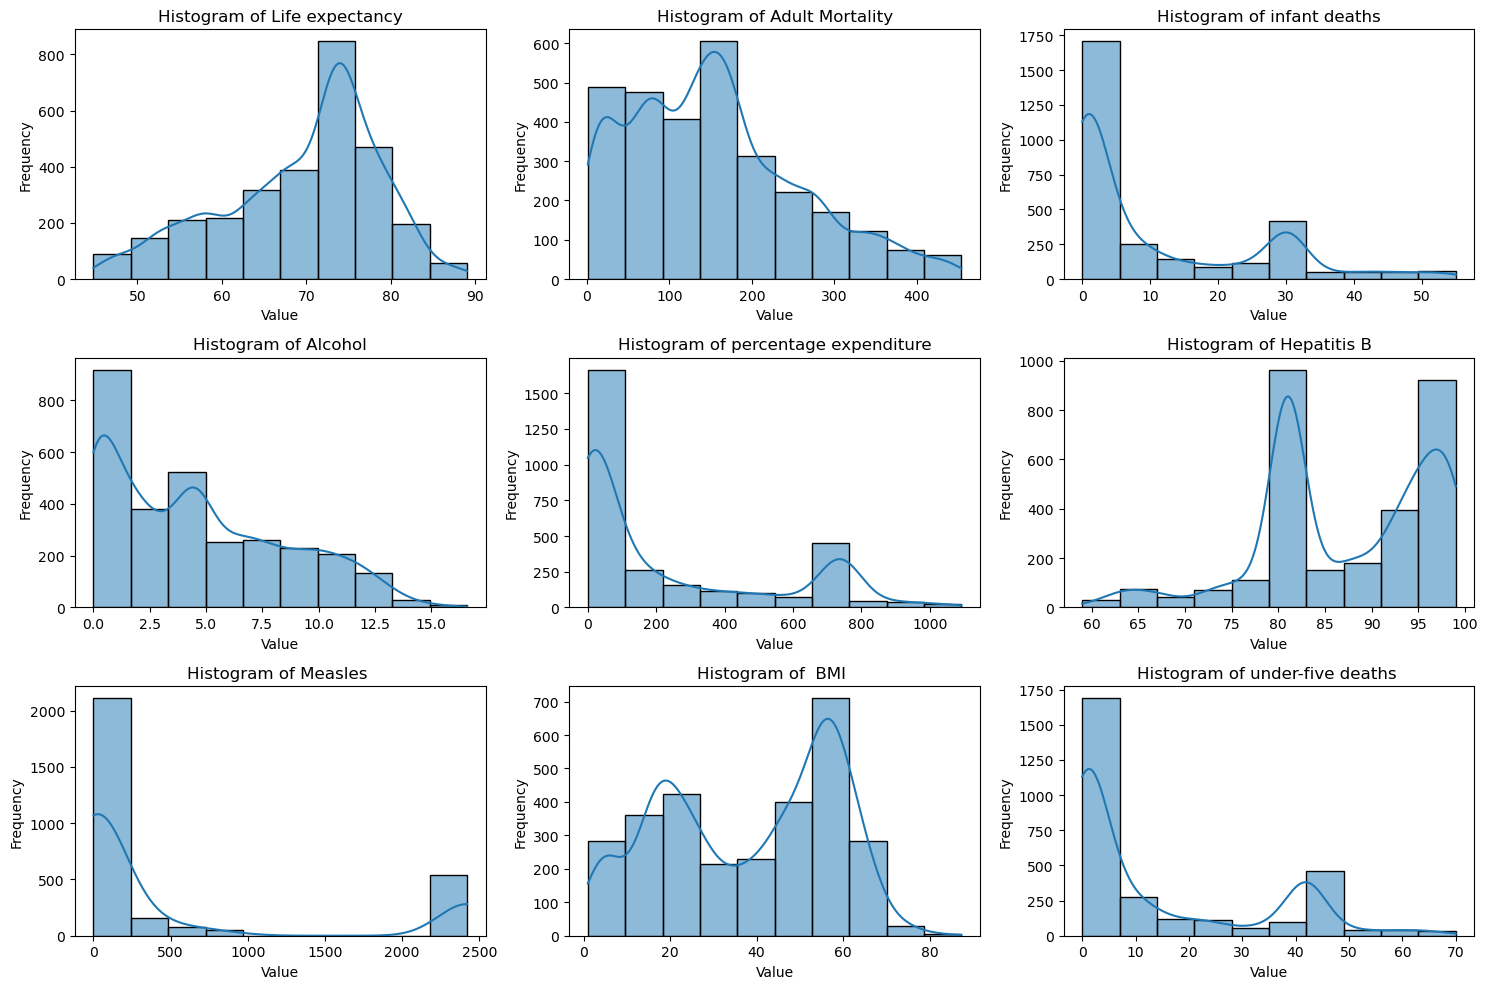

In [18]:
# Remove 'year' column from the numerical columns
numerical_columns_filtered = [col for col in numerical_columns if col != 'Year']

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 3

# Calculate the total number of histograms to be plotted
total_plots = num_rows * num_cols

# Create a new figure and set the size
plt.figure(figsize=(15, 10))

# Iterate over each numerical column and plot a histogram
for i, column in enumerate(numerical_columns_filtered):
    if i >= total_plots:  # Break the loop if all subplots are filled
        break

    # Calculate subplot position
    plt.subplot(num_rows, num_cols, i + 1)

    # Plot histogram using Seaborn
    sns.histplot(life_data[column], kde=True, bins=10)

    # Add title
    plt.title(f'Histogram of {column}')

    # Add labels
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


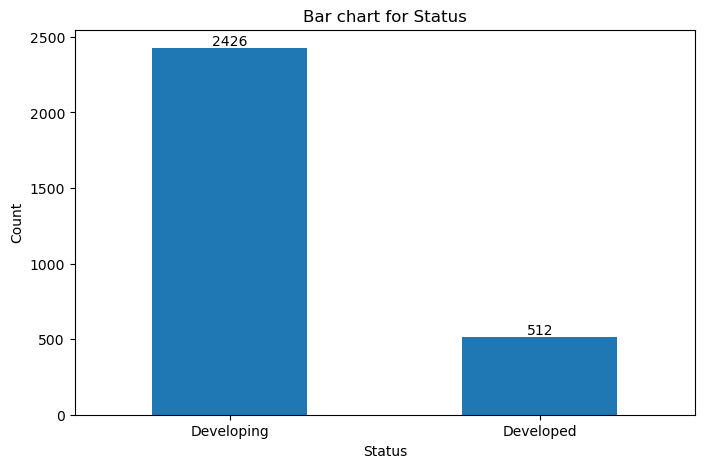

In [19]:
# Generate bar charts for categorical variables(example of object data type is string)

categorical_columns = life_data.select_dtypes(include='object').columns
for column in categorical_columns:
    if column != 'Country':
        # Get the value counts for the column
        value_counts = life_data[column].value_counts()
        # Plot the bar chart
        ax = value_counts.plot(kind='bar', figsize=(8, 5), title=f'Bar chart for {column}', rot=360)
        ax.set_ylabel('Count')

        # Annotate values on top of the bars
        for i, value in enumerate(value_counts):
            plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

        plt.show()

No outliers found for Year
No outliers found for Life expectancy
No outliers found for Adult Mortality
No outliers found for percentage expenditure
No outliers found for Measles 
No outliers found for  BMI 


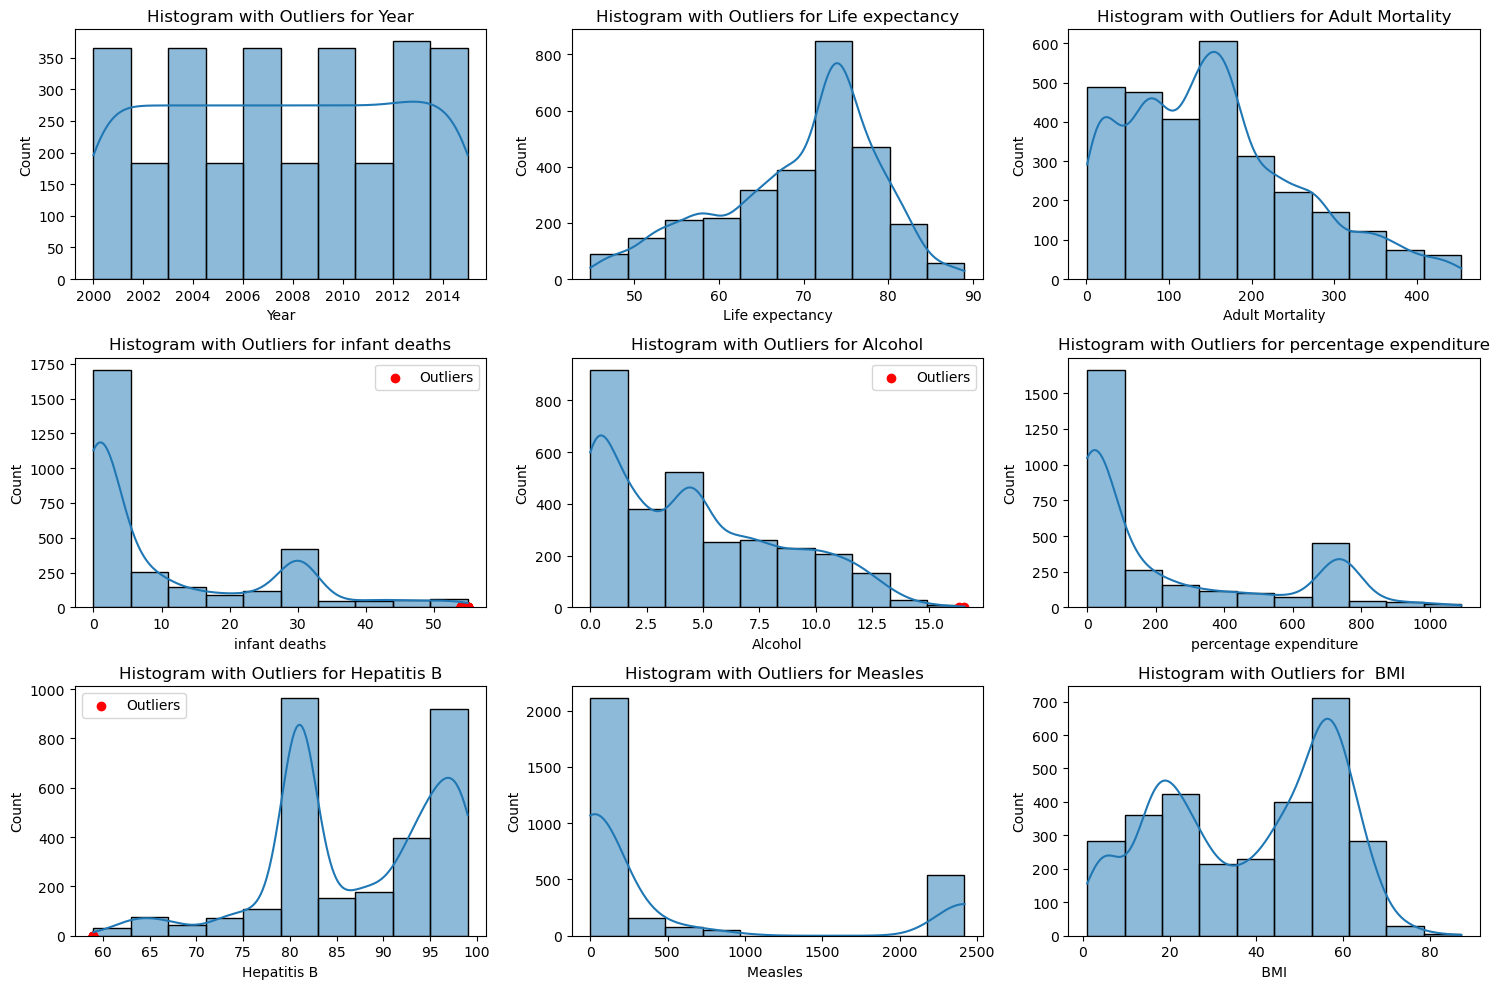

In [20]:
#Outliers
# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 3

# Calculate the total number of plots to be created
total_plots = num_rows * num_cols

# Create a new figure and set the size
plt.figure(figsize=(15, 10))

# Iterate over each numerical column and plot a histogram with outliers
for i, column in enumerate(numerical_columns):
    if i >= total_plots:  # Break the loop if all subplots are filled
        break

    # Calculate mean and standard deviation
    mean = life_data[column].mean()
    std = life_data[column].std()

    # Define the upper and lower bounds for outliers using 3 sigma method
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Identify outliers
    outliers = life_data[(life_data[column] < lower_bound) | (life_data[column] > upper_bound)]

    # Plot the histogram with outliers
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(life_data[column], kde=True, bins=10)
    plt.title(f'Histogram with Outliers for {column}')

    if outliers.empty:
        print(f'No outliers found for {column}')
    else:
        #print(f'Outliers for column {column}\n')
        #print(outliers[column])
        # Highlight outliers in red color
        plt.scatter(outliers[column], np.zeros_like(outliers[column]), color='red', label='Outliers')
        plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
import scipy.stats

# Calculate the kurtosis for each column in the DataFrame
column_kurtosis = numerical_columns.kurtosis()

# Display the kurtosis
print("Kurtosis of each column:")
print(column_kurtosis)


Kurtosis of each column:
Year                                -1.213722
Life expectancy                     -0.234477
Adult Mortality                      1.748860
infant deaths                      116.042756
Alcohol                             -0.802909
percentage expenditure              26.573387
Hepatitis B                          2.770259
Measles                            114.859903
 BMI                                -1.291095
under-five deaths                  109.752795
Polio                                3.776510
Total expenditure                    1.156270
Diphtheria                           3.558143
 HIV/AIDS                           34.892008
GDP                                 12.333074
Population                         298.010267
 thinness  1-19 years                3.970439
 thinness 5-9 years                  4.358730
Income composition of resources      1.392814
Schooling                            0.886151
dtype: float64


In [27]:
column_skewness = numerical_columns.skew()

# Display the skewness
print("Skewness of each column:")
column_skewness


Skewness of each column:


Year                               -0.006409
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
 BMI                               -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
 HIV/AIDS                           5.396112
GDP                                 3.206655
Population                         15.916236
 thinness  1-19 years               1.711471
 thinness 5-9 years                 1.777424
Income composition of resources    -1.143763
Schooling                          -0.602437
dtype: float64

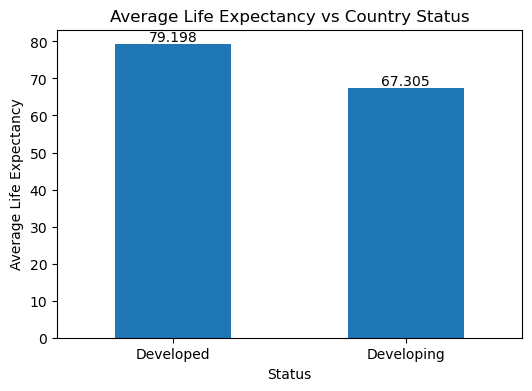

In [28]:
# EDA Bivariate Analysis
# Create bar charts for average price versus categorical variables
if 'Status' in life_data.columns:
    avg_life_expectancy_by_category = life_data.groupby('Status')['Life expectancy'].mean().round(3).sort_values(ascending=False)
    ax = avg_life_expectancy_by_category.plot(kind='bar', figsize=(6, 4), title='Average Life Expectancy vs Country Status', rot=360)
    # Annotate values on top of the bars
    for i, value in enumerate(avg_life_expectancy_by_category):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
    plt.ylabel('Average Life Expectancy')
    plt.show()


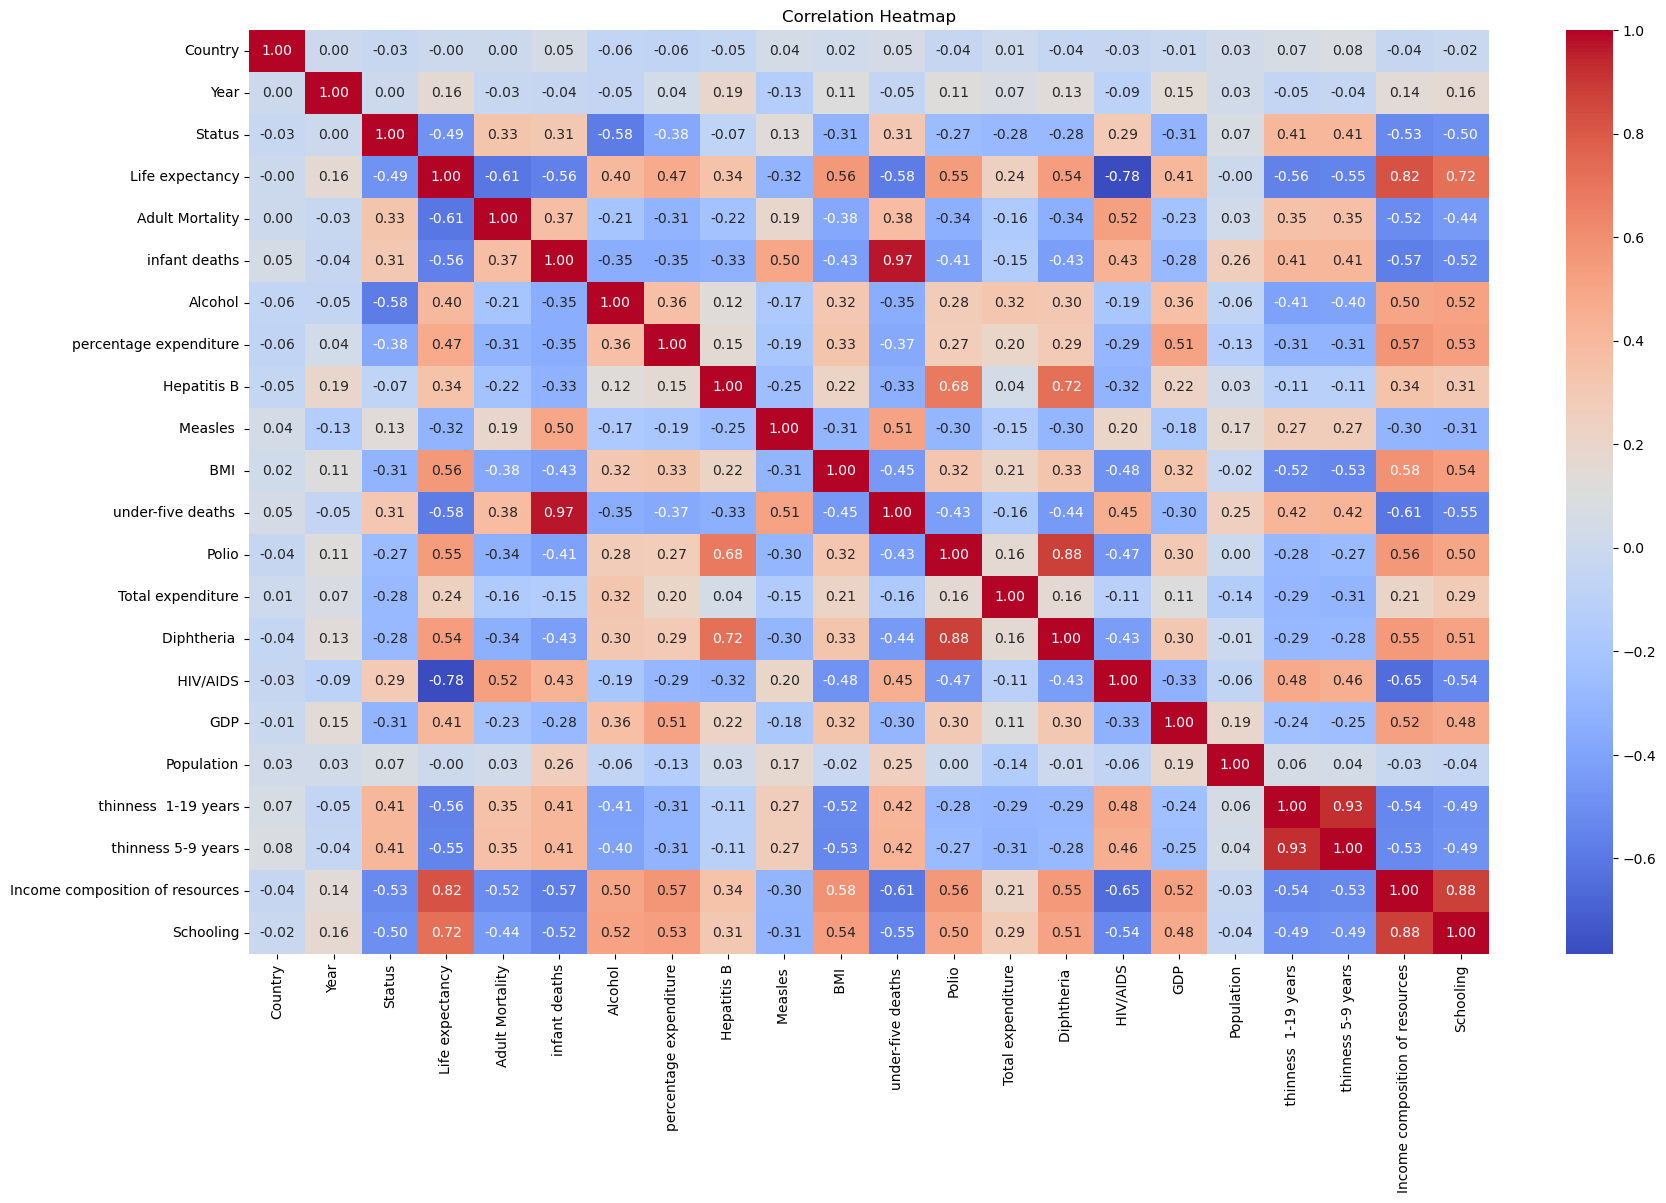

In [29]:
# EDA Multivariate Analysis
from sklearn.preprocessing import LabelEncoder
life_data_corr = life_data.copy()

columns_to_encode = ['Country', 'Status']

label_encoder = LabelEncoder()

for col in columns_to_encode:
    if col in life_data_corr.columns:
        life_data_corr[col] = label_encoder.fit_transform(life_data_corr[col])


correlation_matrix = life_data_corr.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [30]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis: # if we neet to visualized in x-axis
        order = train[x_axis].value_counts().iloc[:top].index

    else : # if we neet to visualized in y-axis
        order = train[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = train, hue = hue, order = order)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()


In [31]:
def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage
    """
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [32]:
def histogram(column_name):

    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot

        sns.histplot(x = col, data = train, kde = True)

        plt.title(col) # set title to each plot
        plt.xlabel("") # replace x label with empty string
        plt.ylabel("") # replace y label with empty string

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

In [33]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.boxplot(x = x_axis, y = y_axis, data = train)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [34]:
# first i neet to split data to train and tes

# import need function
from sklearn.model_selection import train_test_split

# spliting data to train and test
train, test =  train_test_split(life_data, test_size = 0.2, random_state = 42)

In [35]:
# see the impact of "country" on "Life Expectancy"

def country_Life_expectancy(reversed, top = None):
    return train.groupby("Country")["Life expectancy"].median().sort_values(ascending = reversed).reset_index().head(top)

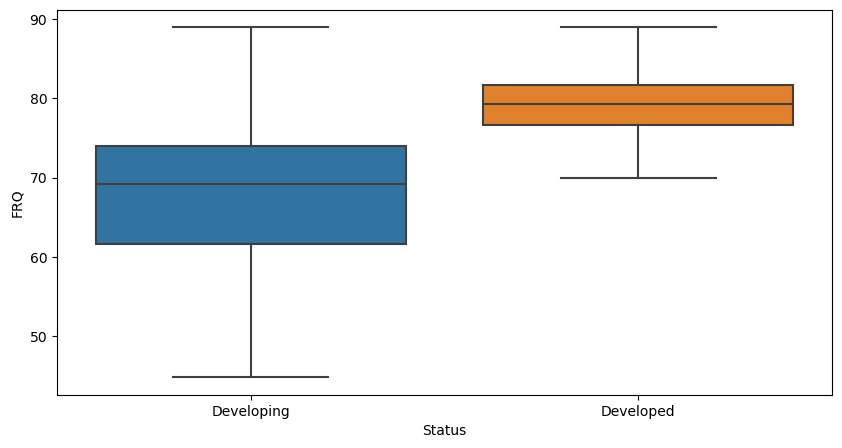

In [36]:
# see the impact of "status" on "Life Expectancy"

# set figure size
plt.figure(figsize=(10,5))

# call function i create it
box_plot(x_axis = "Status", y_axis = "Life expectancy")

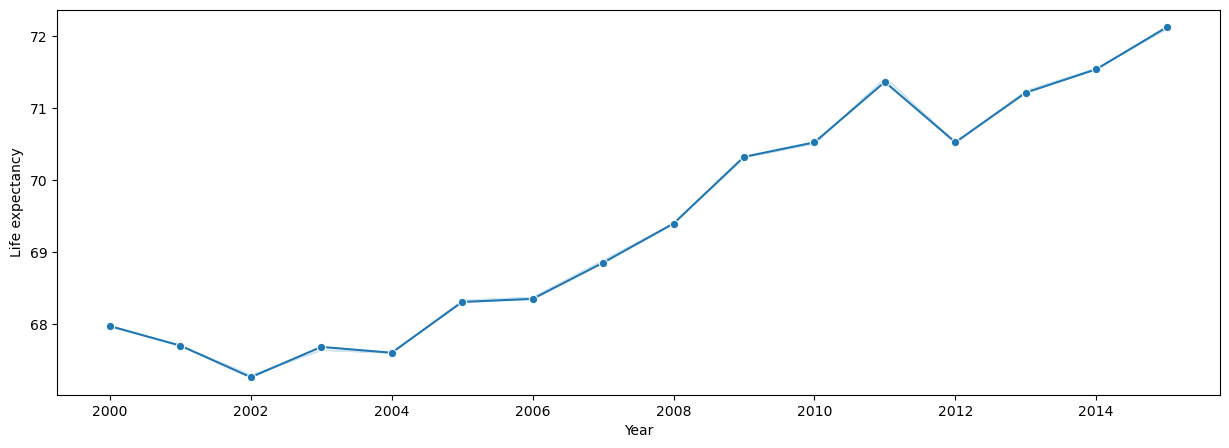

In [37]:
# see the impact of "year" on "Life Expectancy"

# set figure size
plt.figure(figsize=(15,5))

sns.lineplot(x = 'Year', y = 'Life expectancy', data = train, marker = 'o' ,errorbar=('ci', False))
plt.show()